# Melanoma Detectiont

> Authors: [Shubham Sharma](https://www.linkedin.com/in/shubham-sharma-andy/)


### Context of Problem:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


**Steps:**

- [Data Reading/Data Understanding](#data_understanding)

- [Dataset Creation](#data_creation)
    - [Train Test Split](#train_test_split)
    

- [Data Visualization](#data_visualization)
    
- [Model Building & Training](#model_building)
    - [Compile the model](#complie_model)
    - [Train the model](#base_model_training)
    - [Visualizing training results](#visualizing_base_results)
    - [Findings](#base_model_findings)
- [Data Augmentation](#data_augmentation)
    - [Compile the model](#complie_model_v2)
    - [Train the model](#base_model_trainin_v2)
    - [Visualizing training results](#visualizing_base_results_v2)
    - [Findings](#base_model_findings_v2)
- [Class Distribution](#class_distribution)
    - [Handling Class Imbalances](#handle_class_imbalance)
    - [Flatten Folder Structure](#flatten_dir)
    - [Train Test Split](#train_test_split_final)
    - [Train the model](#final_model_train)
    - [Findings](#final_model)


## Importing all the important libraries

In [51]:
from glob import glob
from collections import Counter
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

## Data Reading/Data Understanding<a name="data_understanding"></a>

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

Note: To import the data use the below steps:

**Step1: Install gdown**
```bash
$pip install gdown
```
**Step2: Create data folder**
```bash
$mkdir data
$cd data

```
**Step3: Download the zip file from google drive**
```bash
$gdown --id 1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
```

**Step4: Extract the zip file**
```bash
$unzip CNN_assignment.zip
```

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Dataset Creation<a name="data_creation"></a>

Create training and validation datasets using TensorFlow's image_dataset_from_directory function, resizing images to 180x180 with a batch size of 32.


In [4]:
batch_size = 32
img_height = 180
img_width = 180

**Train test split**<a name="train_test_split"></a>

Use 80% of the images for training, and 20% for validation.

In [5]:
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


I0000 00:00:1736954314.747724  785927 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14313 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1736954314.748157  785927 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13730 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:02:00.0, compute capability: 8.6


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Data Visualization <a name="data_visualization"></a>

Visualize one instance from each of the 9 classes.

2025-01-15 20:48:37.354276: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-15 20:48:37.466015: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-15 20:48:37.656916: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-01-15 20:48:38.443157: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


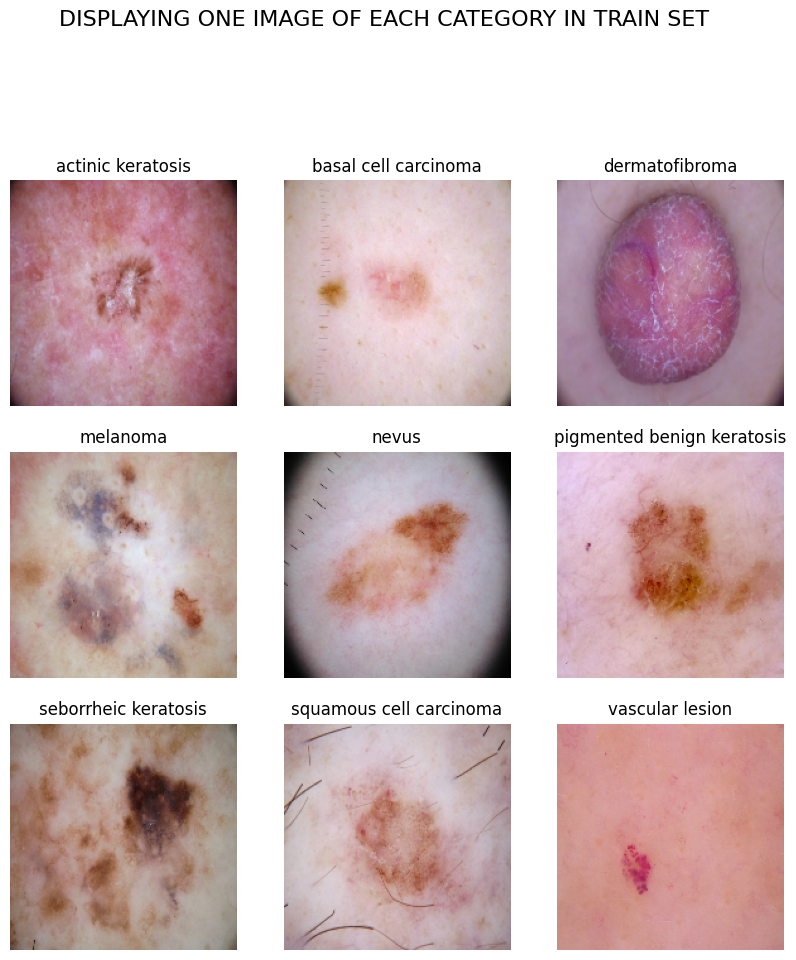

In [8]:

plt.figure(figsize=(10, 10))
plt.suptitle('displaying one image of each category in train set'.upper(), 
             y= 1.05, fontsize= 16)

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))

    for image, label in filtered_ds.take(1):

        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Building & Training <a name="model_building"></a>

* Build a CNN model and normalize pixel values between 0 and 1 by adding a rescaling layer.
* Compile the model with an appropriate optimizer and loss function.
* Train for 20 epochs and evaluate for overfitting/underfitting.


In [10]:
# Ensure the code runs on GPU if available

device_name = tf.test.gpu_device_name()
if device_name:
    print(f"Using GPU: {device_name}")
else:
    print("GPU not found. Using CPU.")


Using GPU: /device:GPU:0


I0000 00:00:1736954322.663671  785927 gpu_device.cc:2022] Created device /device:GPU:0 with 14313 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1736954322.663781  785927 gpu_device.cc:2022] Created device /device:GPU:1 with 13730 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:02:00.0, compute capability: 8.6


In [11]:
### Your code goes here
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])


/home/andy/venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile the model**<a name="complie_model"></a>

Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**<a name="base_model_training"></a>

Train the model using the training and validation datasets for 20 epochs.

```bash
Note: The training is carried out on GPU
```

In [14]:
epochs = 20
with tf.device('/GPU:0'):  # Ensure training runs on GPU
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
    )

Epoch 1/20


I0000 00:00:1736954327.930626  786564 service.cc:148] XLA service 0x7ff7b0008cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736954327.930783  786564 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
I0000 00:00:1736954327.930786  786564 service.cc:156]   StreamExecutor device (1): NVIDIA RTX A4000, Compute Capability 8.6
2025-01-15 20:48:47.947317: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736954328.017742  786564 cuda_dnn.cc:529] Loaded cuDNN version 90600


 9/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1340 - loss: 2.3899

I0000 00:00:1736954329.900551  786564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2027 - loss: 2.1395 - val_accuracy: 0.2886 - val_loss: 1.8824
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3319 - loss: 1.7877 - val_accuracy: 0.4362 - val_loss: 1.5534
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4457 - loss: 1.5605 - val_accuracy: 0.4430 - val_loss: 1.5073
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4841 - loss: 1.4534 - val_accuracy: 0.5235 - val_loss: 1.4198
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5251 - loss: 1.3552 - val_accuracy: 0.5369 - val_loss: 1.3917
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5600 - loss: 1.2922 - val_accuracy: 0.5235 - val_loss: 1.3987
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5879 - loss: 1.2043 - val_accuracy: 0.5347 - val_loss: 1.4895
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5731 - loss: 1.2159 - val_accuracy: 0.4944 - val_loss: 1.

**Visualizing training results**<a name="visualizing_base_results">

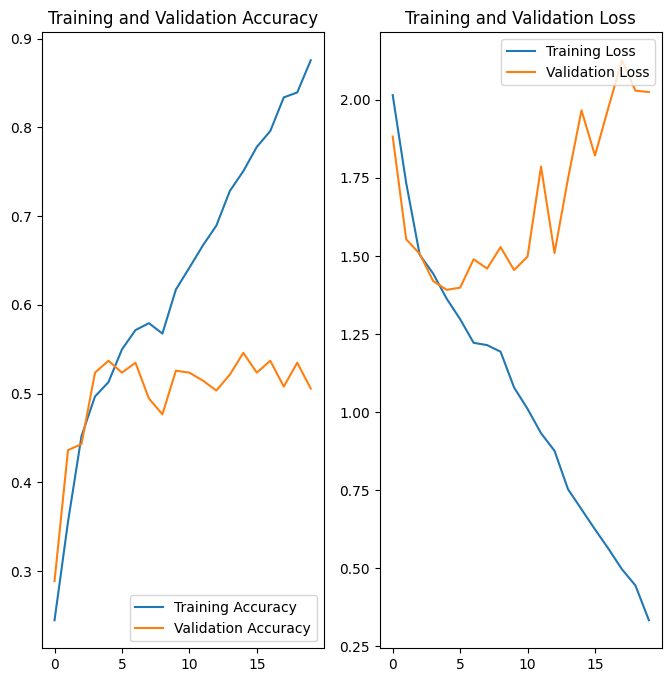

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings: <a name="base_model_findings"></a>

The model has clearly overfitter with Traning Accuracy reaching near 90% and Validation accuracy close to 50% only

# Data Augmentation <a name="data_augmentation"></a>

Apply augmentation (e.g., flipping, rotation, zoom).

In [16]:
# Here we have applied horizontal flip, rotation and zoom agumentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


2025-01-15 20:49:09.499588: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


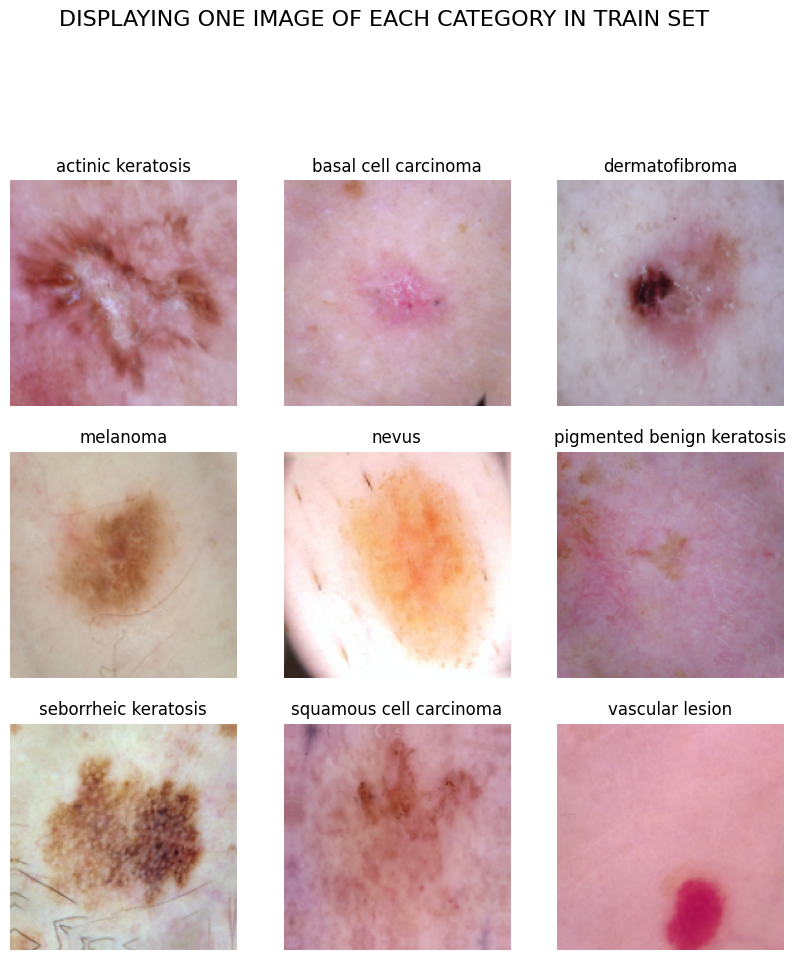

In [17]:
# Visualising the images again using augmentation

plt.figure(figsize=(10, 10))
plt.suptitle('displaying one image of each category in train set'.upper(), 
             y= 1.05, fontsize= 16)

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))

    for image, label in filtered_ds.take(1):

        ax = plt.subplot(3, 3, i+1)
        augmented_image = data_augmentation(image[0])

        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

plt.show()

**Create & Compile the model**<a name="complie_model_v2"></a>

As we have seen overfitting in the previous iteration we will be adding Dopout and BatchNormalization layers to the model

In [18]:
model = Sequential([
        
        # Rescaling Layer
        layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    
        # Data Augmentation Layer
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomContrast(0.1), 
        layers.RandomZoom(0.1,0.2,),

        
        # Convolutional Layers with Batch Normalization and Dropout
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(9, activation='softmax')  # 9 output classes
    ])



### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 180, 180, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,905 (25.36 MB)

 Trainable params: 6,648,521 (25.36 MB)

 Non-trainable params: 384 (1.50 KB)

**Train the model**<a name="base_model_trainin_v2"></a>
    

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
with tf.device('/GPU:0'):  # Ensure training runs on GPU
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
    )

Epoch 1/20


E0000 00:00:1736954350.612923  785927 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2789 - loss: 2.6036 - val_accuracy: 0.1946 - val_loss: 2.2927
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4308 - loss: 1.7339 - val_accuracy: 0.1544 - val_loss: 2.3410
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4614 - loss: 1.6304 - val_accuracy: 0.2774 - val_loss: 2.4363
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4610 - loss: 1.6239 - val_accuracy: 0.2707 - val_loss: 2.0432
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4890 - loss: 1.4837 - val_accuracy: 0.2461 - val_loss: 1.9687
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5280 - loss: 1.4184 - val_accuracy: 0.2394 - val_loss: 2.0060
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5055 - loss: 1.4047 - val_accuracy: 0.4318 - val_loss: 1.6734
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5164 - loss: 1.3420 - val_accuracy: 0.4161 - val_loss: 1.

**Visualizing the results**<a name="visualizing_base_results_v2"></a>

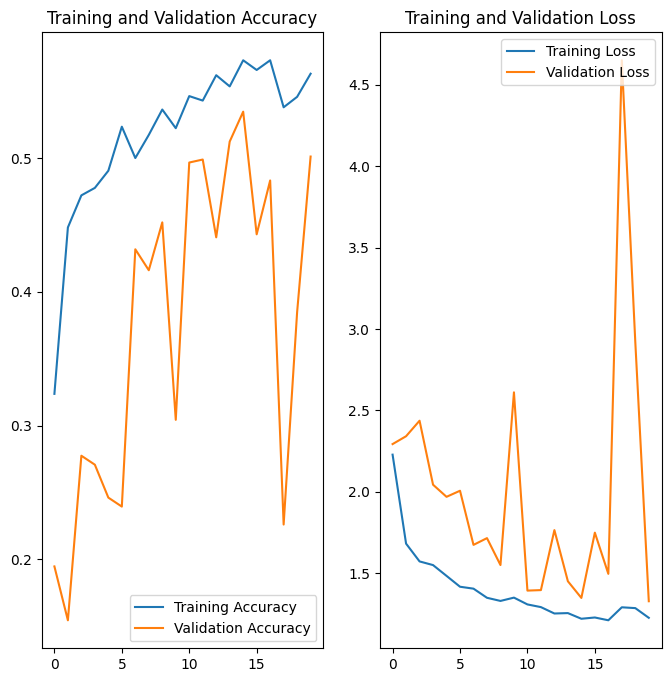

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("test_2.png")
plt.show()


**Findings**<a name="base_model_findings_v2"></a>

1. Training Accuracy and Loss:

- The training accuracy remains low or plateaus early, indicating the model is not learning the patterns in the training data effectively.
- The training loss does not decrease significantly over the epochs, showing the model struggles to minimize the error even on the training set.
Validation Accuracy:

2. Validation accuracy 
- Remains consistently low and does not show much improvement, indicating the model is unable to generalize to unseen data due to insufficient learning.
- The gap between training and validation accuracy is small, but both remain low, which is a typical sign of underfitting.
  
3. Validation Loss:
- The validation loss remains high or decreases only slightly, indicating the model is not capturing the underlying patterns in the data.
- There is no significant mismatch between training and validation loss, but both are high, confirming underfitting.


# Class Distribution <a name= "class_distribution"></a>

Examine class distribution in the training dataset.

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [40]:
distribution_dict = {}
for item in os.listdir(data_dir_train):
    distribution_dict[item]=len(os.listdir(os.path.join(data_dir_train,item)))
print(dict(sorted(distribution_dict.items(), key=lambda item: item[1],reverse=True)))

{'pigmented benign keratosis': 462, 'melanoma': 438, 'basal cell carcinoma': 376, 'nevus': 357, 'squamous cell carcinoma': 181, 'vascular lesion': 139, 'actinic keratosis': 114, 'dermatofibroma': 95, 'seborrheic keratosis': 77}


#### - The class with the least number of samples is seborrheic keratosis with 77 samples.

#### - Dominant classes: ```pigmented benign keratosis```, ```melanoma```, ```basal cell carcinoma```, and ```nevus```. Together, these four classes account for approximately 73% of the dataset.
```
pigmented benign keratosis (20.64%)
melanoma (19.56%)
basal cell carcinoma (16.79%)
nevus (15.95%)
```



**Handling Class Imbalances**<a name="handle_class_imbalance"></a>

You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [42]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [44]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(data_dir_train,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFA54905600>: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 842.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFA54705930>: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 924.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF943F52170>: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 661.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7FF958138F10>: 100%|█████████████████████████████████████████████████████| 500/500 [00:02<00:00, 172.81 Samples/s]


Initialised with 357 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FF94EB74280>: 100%|█████████████████████████████████████████████████████| 500/500 [00:02<00:00, 171.88 Samples/s]


Initialised with 462 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF943F3F4C0>: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 807.85 Samples/s]


Initialised with 77 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF943FB90F0>: 100%|██████████████████████████████████████████████████████| 500/500 [00:01<00:00, 384.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF958297F40>: 100%|█████████████████████████████████████| 500/500 [00:00<00:00, 836.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF95BEFD840>: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 836.71 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [53]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
class_names = [os.path.basename(os.path.dirname(os.path.dirname(path))) for path in path_list]
class_distribution_new = Counter(class_names)
print("Class Distribution after Augmentation:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count+ distribution_dict[class_name]}")


Class Distribution after Augmentation:
nevus: 857
melanoma: 938
vascular lesion: 639
squamous cell carcinoma: 681
actinic keratosis: 614
basal cell carcinoma: 876
dermatofibroma: 595
pigmented benign keratosis: 962
seborrheic keratosis: 577


*So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.*

**Flatten Folder Structure**<a name="flatten_dir"></a>

In [54]:
# Moving Augmented Images to Class Directories
import shutil

# Iterate over each class directory
for class_dir in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_dir)
    if os.path.isdir(class_path):
        # Check for the 'output' directory
        output_dir = os.path.join(class_path, 'output')
        if os.path.exists(output_dir):
            # Move all images from 'output' to the class directory
            for file in os.listdir(output_dir):
                src = os.path.join(output_dir, file)
                dest = os.path.join(class_path, file)
                shutil.move(src, dest)
            # Remove the now-empty 'output' directory
            os.rmdir(output_dir)
            print(f"Data flatten completed for class: {class_dir}")


Data flatten completed for class: nevus
Data flatten completed for class: melanoma
Data flatten completed for class: vascular lesion
Data flatten completed for class: squamous cell carcinoma
Data flatten completed for class: actinic keratosis
Data flatten completed for class: basal cell carcinoma
Data flatten completed for class: dermatofibroma
Data flatten completed for class: pigmented benign keratosis
Data flatten completed for class: seborrheic keratosis


**Train Test Split**<a name="train_test_split_final"></a>

In [56]:
batch_size = 32
img_height = 180
img_width = 180

In [58]:
# Create a training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [60]:
# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Train the model**<a name="final_model_train"></a>

*Train the model on the data created using Augmentor*

In [126]:
# Create your model (make sure to include normalization)
model = Sequential([
        
        # Rescaling Layer
        layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    
        # Data Augmentation Layer
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomContrast(0.1), 
        layers.RandomZoom(0.1,0.2,),

        
        # Convolutional Layers with Batch Normalization and Dropout
        layers.Conv2D(32, (3, 3),padding="same", activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2),
        
        layers.Conv2D(64, (3, 3),padding="same" ,activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2),

        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(9, activation='softmax')  # 9 output classes
    ])


/home/andy/venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compile your model (Choose optimizer and loss function appropriately)

In [127]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### *This time, we will train the model for 50 epochs while introducing an EarlyStopping callback, as the earlier iteration showed signs of underfitting. To address this, we will make the model more complex to better capture the underlying patterns in the data.*

* Also we will save the best model in /tmp/ckpt folder*

In [128]:
# create an EarlyStopping callback.
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                        )

# create a callback to save the best trained model.
checkpoint_filepath = '/tmp/ckpt/melanoma.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    verbose=True,
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)



In [129]:
#model training 
epochs = 50
checkpoint_filepath='/tmp/checkpoint'
## Your code goes here, use 50 epochs.
with tf.device('/GPU:0'):  # Ensure training runs on GPU
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[callback,model_checkpoint_callback]
    )

Epoch 1/50


/home/andy/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1488 - loss: 2.1570
Epoch 1: loss improved from inf to 2.08004, saving model to /tmp/ckpt/melanoma.model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1495 - loss: 2.1552 - val_accuracy: 0.2279 - val_loss: 1.9164
Epoch 2/50
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2742 - loss: 1.8198
Epoch 2: loss improved from 2.08004 to 1.73100, saving model to /tmp/ckpt/melanoma.model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2751 - loss: 1.8177 - val_accuracy: 0.3905 - val_loss: 1.5167
Epoch 3/50
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3845 - loss: 1.5719
Epoch 3: loss improved from 1.73100 to 1.54617, saving model to /tmp/ckpt/melanoma.model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3847 - loss: 1.5713 - val_accuracy: 0.4031 - val_loss: 1.4644
Epoch 4/50
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4175 - loss: 1.4944
Epoch 4: loss improved from 

#### **Todo:**  Visualize the model results

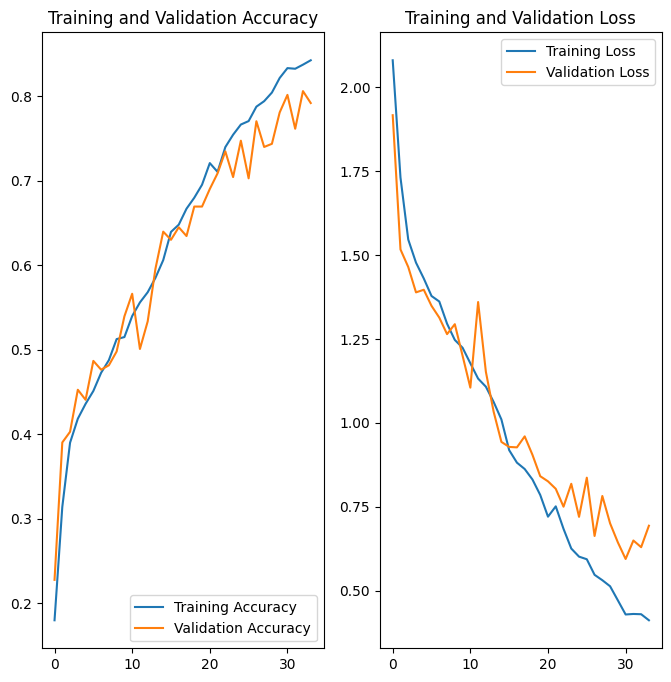

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(34)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("test.png")
plt.show()

#### Findings<a name="final_model"></a>

*The training curves shows some pretty good results here.*

- *The model improved significantly from the initial 20% accuracy to reach about 80% validation accuracy, which is a solid improvement. The fact that the training and validation curves track each other closely until epoch 32 shows that the model was learning effectively without major overfitting issues.*

- *The steadily decreasing loss curves and high final accuracy indicate we have successfully handled any underfitting that might have been present before. The class rebalancing strategy seems to have worked well too.*

- *In this case, Early Stopping was effective in preventing overfitting and stopping training at the optimal point, allowing the model to perform better on unseen data.*